In [1]:
#Importamos módulos

import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
import pydicom
import matplotlib
from skimage import measure, viewer
matplotlib.use('TkAgg') # Para que se pueda abrir una nueva ventana


/home/mario/.local/lib/python3.8/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [2]:
#Importamos la imagen e introducimos la semilla
ds = pydicom.dcmread('D0120.dcm',force=True)
img = ds.pixel_array
img = img/img.max()
plt.imshow(img, cmap = 'gray')
seed_coord = plt.ginput(1, timeout = 7)

In [4]:
#Extraemos las coordenadas de la semilla seleccionada en la imagen
print(seed_coord)
y, x = int([x for y,x in seed_coord][0]), int([y for y,x in seed_coord][0])
intensity = img[y,x]
print(intensity)

[(280.45952906548933, 231.29396615158203)]
0.6061288868859847


In [5]:
def RegionGrowingP2(image, umbr_inf,umbr_max):
    binarized_image = np.logical_and(image > intensity-umbr_inf, image < intensity+umbr_max)*1
    return binarized_image


In [6]:
%matplotlib inline
binarized_image = RegionGrowingP2(img, 0.1,0.1)

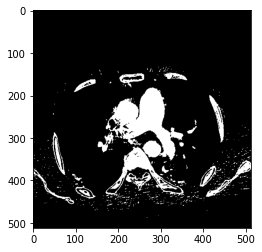

In [7]:
plt.imshow(binarized_image, cmap = "gray")

In [8]:
    labeled = measure.label(binarized_image, background=False, connectivity=2)
    label = labeled[y,x] # known pixel location
    extracted_image = (labeled==label)*img

36


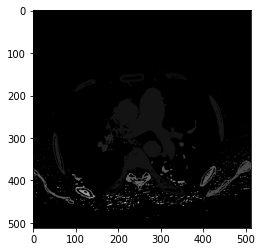

In [9]:
plt.imshow(labeled,cmap = "gray")
print(label)

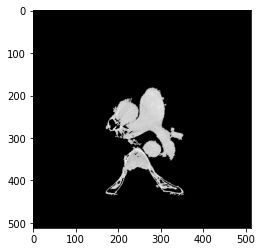

In [10]:
plt.imshow(extracted_image,cmap = "gray")